# Importing Libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path for df
path = r"C:\Users\Artemis07\Downloads\29-08-2023 Instacart Basket Analysis"

In [3]:
#importing df
merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merge.pkl'))

In [4]:
merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,num_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Create a histogram of "order_hour_of_day"

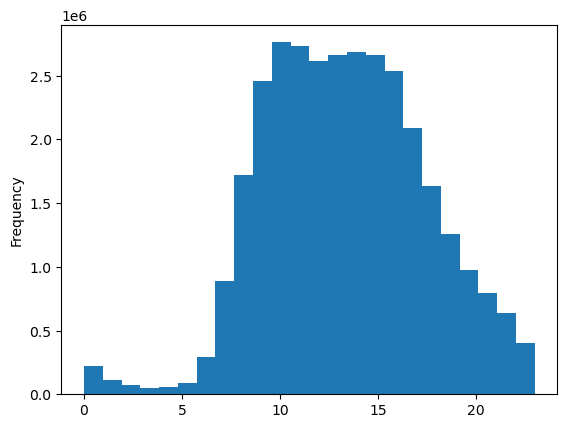

In [10]:
hist_order_hour_of_day = merged['order_hour_of_day'].plot.hist(bins = 24)

_The histogram of "order_hour_of_day" illustrates the busiest hours for placing orders. The histogram demonstrates that the hours between 9 am and 4 pm is the peak period for placing orders whereas the hours between 1 am and 6 am are the lowest. Furthermore there is a steady decrease the the orders placed after 4 pm._ 

In [32]:
#exporting histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'hist_order_hour_of_day.png'))

## Create a bar chart from the "loyalty_flag" column 

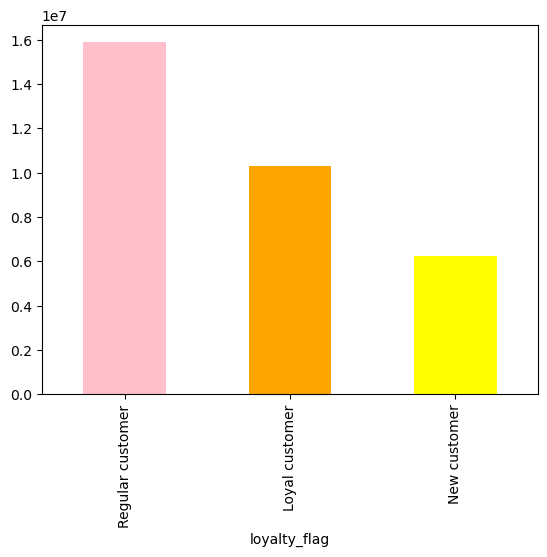

In [13]:
bar_loyalty_flag = merged['loyalty_flag'].value_counts().plot.bar(color = ['pink', 'orange', 'yellow'])

In [33]:
#exporting bar graph
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

## Create a line chart using sample data

In [14]:
#create sample from a list of random floating numbers 
np.random.seed(4)
dev = np.random.rand(len(merged)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
# splitting the merged dataframe into big and small
big = merged[dev]
small = merged[~dev]

In [17]:
# checking size of merged
len(merged)

32404859

In [18]:
# confirming the size of big + small
len(big) + len(small)

32404859

In [19]:
# working with the samples of merged df
merged_2 = small[['order_hour_of_day', 'prices']]

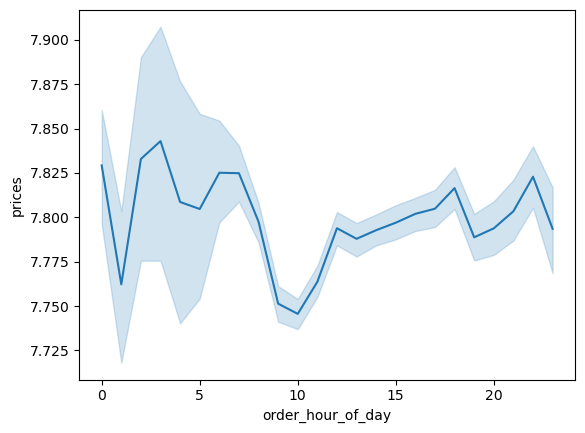

In [21]:
#creating the line graph
line_hour_of_day = sns.lineplot(data = merged_2, x = 'order_hour_of_day', y = 'prices')

In [34]:
#exporting line_hour_of_day
line_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day.png'))

## Create a line chart to determine connection between age and family situation

In [26]:
merged_3 = small[['age', 'num_of_dependants']]

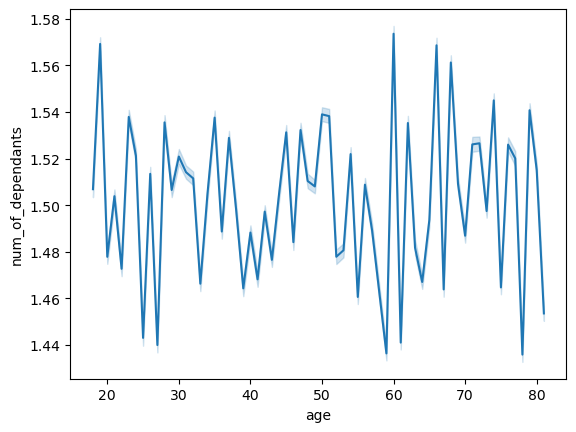

In [28]:
line_age_num_of_dependents = sns.lineplot(data = merged, x = 'age', y = 'num_of_dependants')

_The line chart 'line_age_num_of_dependents' does not appear to depict any particular correlation between age and the number of dependents_

In [35]:
#exporting line_age_num_of_dependents
line_age_num_of_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_num_of_dependents.png'))

## Create a scatterplot between age and income

In [29]:
merged_4 = small[['age', 'income']]

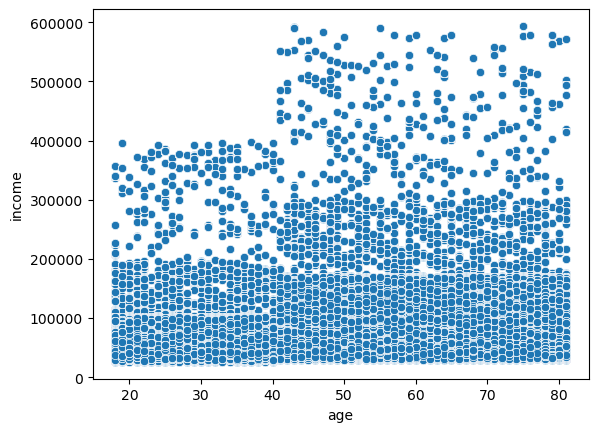

In [38]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = merged_4)

_The scatterplot illustrates that the majority of individuals remain under 200000 in regards to income however in older individuals aged 40-80 there are more outliers who have an much higher spending power over that of ages 20-39. The scatterplot shows that once individuals turn 40 their potential earns would change from 400000 to 600000. As such the scatterplot between age and income depicts that there is a correlation between the two_

In [39]:
#exporting scatterplot_age_income
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))